# JoRo! Analytics

<center>
<h2>"If you torture the data long enough, it will confess." <sub>- Ronald Coase, Economist</sub></h2>
<hr>
<img src="http://i68.tinypic.com/16j4snn.jpg" alt="Golden State Warriors Team" width="800" height="900">
<hr>

</center>

###### Activate .ipynb Module

In [1]:
import io, os, sys, types
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

In [2]:
def find_notebook(fullname, path=None):
    """find a notebook, given its fully qualified name and an optional path

    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path

In [3]:
class NotebookLoader(object):
    """Module Loader for Jupyter Notebooks"""
    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path

    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)

        print ("importing Jupyter notebook from %s" % path)

        # load the notebook object
        with io.open(path, 'r', encoding='utf-8') as f:
            nb = read(f, 4)


        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod

        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__

        try:
          for cell in nb.cells:
            if cell.cell_type == 'code':
                # transform the input to executable Python
                code = self.shell.input_transformer_manager.transform_cell(cell.source)
                # run the code in themodule
                exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod

In [4]:
class NotebookFinder(object):
    """Module finder that locates Jupyter Notebooks"""
    def __init__(self):
        self.loaders = {}

    def find_module(self, fullname, path=None):
        nb_path = find_notebook(fullname, path)
        if not nb_path:
            return

        key = path
        if path:
            # lists aren't hashable
            key = os.path.sep.join(path)

        if key not in self.loaders:
            self.loaders[key] = NotebookLoader(path)
        return self.loaders[key]

In [5]:
mynba = find_notebook('mynba')

In [6]:
path = '/Users/josephrosas/Documents/2education/2_py/finalproject/'

In [7]:
NotebookFinder().find_module(mynba, path)

In [8]:
sys.meta_path.append(NotebookFinder())

###### Import Modules

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import collections
import seaborn as sns
import plotly

In [10]:
import mynba  # My Jupyter file (.ipynb) created as a module for this notebook.

importing Jupyter notebook from mynba.ipynb


# National Basketball Association (NBA) Analytics

<div align="justify">Here is my soft introduction to my NBA Analytics Python project. The datasets used in this project are results of web scraping through a popular Python module called <a href="http://selenium-python.readthedocs.io">Selenium</a>. I put this module to work on sports-related websites such as <a href="http://www.espn.com">ESPN.com</a> and <a href="https://stats.nba.com">Stats.NBA.com</a>. This web scraping resulted in the creation of three .ipynb files. The first one is <b>"NBA Web Scraping.ipynb"</b> - This file contains all foundational Python (and SQL) code I organized together in order to scrap relevant data from the aforementioned websites. The second is <b>"mynba.ipynb"</b> - This was created for the specific intent of providing a clean file with functions, models, CSV to pandas codes and it will continue growing the more insightful analtyics results we develop.
</div>

<hr>
<center><img src="http://i68.tinypic.com/2v10nz7.jpg" alt="San Antonio Spurs Players with mathematics as a background." width="600" height="700" ></center>
<hr>

<b>DataFrames</b> <p>(more to come)</p>
1. plyr_sal
2. plyr_info
3. team_stats

<b>Classes</b> <p>(more to come)</p>
1. PlayerInfo
2. LeagueStats

<hr>
<b>References For Python / SQL / Query</b>
- https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_query.html#pandas.read_sql_query

<hr>

<b>References NBA Statistical Details</b>
- https://stats.nba.com/leaders/?Season=2017-18&SeasonType=Regular%20Season (PLAYERS)
- https://stats.nba.com/teams/traditional/?sort=W_PCT&dir=-1&Season=2017-18&SeasonType=Regular%20Season (TEAMS)

In [11]:
pd.set_option('display.max_columns', None)  # Ability to view ALL columns

In [12]:
# DataFrames from a previously created (mynba.ipynb) module - still a work in progress!

plyr_sal = mynba.plyr_sal
plyr_info = mynba.plyr_info
playerinfo = mynba.PlayerInfo
leaguestats = mynba.LeagueStats
teams = mynba.team_stats

In [13]:
# Useful variables created during several exploratory stages

nba_rookies = plyr_info[plyr_info['EXP'] == 'R']

###### Example One [ Improving Deficiencies ] 

In [14]:
# Sort (by number of wins) top 5 and last 5 NBA teams

top5 = teams.sort_values(by=['WIN'], ascending=False).head()
bot5 = teams.sort_values(by=['WIN'], ascending=True).head()

In [15]:
# Index DataFrame to use relevant numerical data for comparison

first5 = top5.iloc[:, 6:]
last5 = bot5.iloc[:, 6:]

In [16]:
# Dropping (removing) additional columns that do not fit the comparison objective

first5 = first5.drop(['PTS', 'BLKA', 'TOv'], axis=1)
last5 = last5.drop(['PTS', 'BLKA', 'TOv'], axis=1)

In [17]:
# Find statistical average of best five (first5) and worst five (last5) teams

top_avg = first5.mean()
bot_avg = last5.mean()

In [18]:
df = top_avg.subtract(
    bot_avg
)  # Subject from each other to see what categories are higher correlated

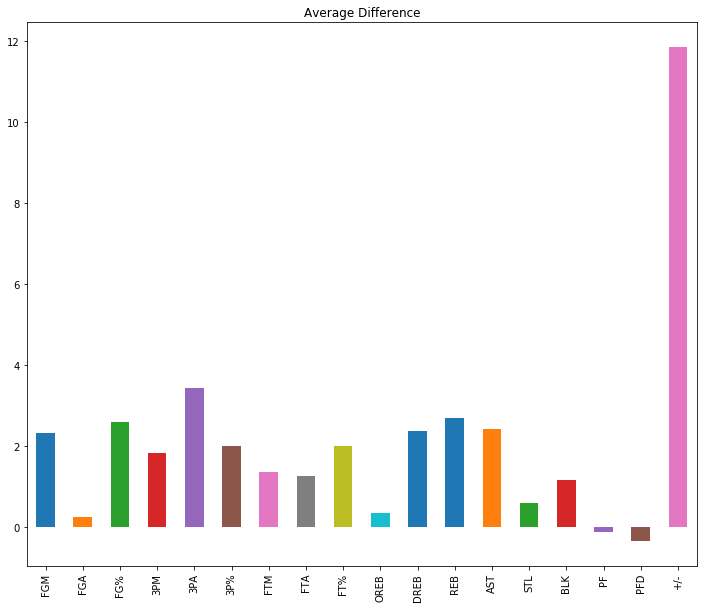

In [19]:
df.plot(kind='bar', figsize=(12, 10), title='Average Difference')

In [20]:
top5

,TEAM,GP,WIN,LOSE,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOv,STL,BLK,BLKA,PF,PFD,+/-
10,Houston Rockets,82,65,17,0.793,48.2,112.4,38.7,84.2,46.0,15.3,42.3,36.2,19.6,25.1,36.2,9.0,34.5,43.5,21.5,13.8,8.5,4.8,4.4,19.5,20.4,8.5
27,Toronto Raptors,82,59,23,0.720,48.4,111.7,41.3,87.4,47.2,11.8,33.0,35.8,17.3,21.8,35.8,9.8,34.2,44.0,24.3,13.4,7.6,6.1,4.9,21.7,19.9,7.8
9,Golden State Warriors,82,58,24,0.707,48.1,113.5,42.8,85.1,50.3,11.3,28.9,39.1,16.6,20.3,39.1,8.4,35.1,43.5,29.3,15.4,8.0,7.5,3.7,19.6,18.5,6.0
1,Boston Celtics,82,55,27,0.671,48.3,104.0,38.3,85.1,45.0,11.5,30.4,37.7,16.0,20.7,37.7,9.4,35.1,44.5,22.5,14.0,7.4,4.5,4.4,19.7,19.2,3.6
22,Philadelphia 76ers,82,52,30,0.634,48.2,109.8,40.8,86.6,47.2,11.0,29.8,36.9,17.1,22.8,36.9,10.9,36.5,47.4,27.1,16.5,8.3,5.1,5.1,22.1,20.4,4.5


In [21]:
bot5

,TEAM,GP,WIN,LOSE,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOv,STL,BLK,BLKA,PF,PFD,+/-
23,Phoenix Suns,82,21,61,0.256,48.1,103.9,38.5,87.1,44.2,9.3,27.9,33.4,17.7,23.9,33.4,10.3,33.9,44.1,21.3,15.7,6.9,4.5,6.0,22.0,20.9,-9.4
14,Memphis Grizzlies,82,22,60,0.268,48.1,99.3,36.7,82.8,44.4,9.2,26.2,35.2,16.6,21.1,35.2,9.5,31.0,40.5,21.5,15.0,7.5,4.8,5.1,23.2,20.4,-6.2
6,Dallas Mavericks,82,24,58,0.293,48.3,102.3,38.1,85.9,44.4,11.8,32.8,36.0,14.2,18.7,36.0,8.1,33.1,41.3,22.7,12.3,7.0,3.8,4.5,19.2,19.6,-3.0
0,Atlanta Hawks,82,24,58,0.293,48.1,103.4,38.2,85.5,44.6,11.2,31.0,36.0,15.8,20.2,36.0,9.1,32.8,41.9,23.7,15.6,7.8,4.2,5.5,19.6,20.3,-5.5
21,Orlando Magic,82,25,57,0.305,48.1,103.4,38.8,85.9,45.2,10.3,29.3,35.1,15.5,20.5,35.1,8.8,32.8,41.6,23.4,14.5,7.6,4.9,4.9,19.3,19.0,-4.8


In [22]:
top_avg[['3PA']] - bot_avg[['3PA']]

3PA    3.44
dtype: float64

In [23]:
top_avg[['REB']] - bot_avg[['REB']]

REB    2.7
dtype: float64

In [24]:
suns_options = plyr_info[(plyr_info['3PA'] > 3.44) & (plyr_info['REB'] > 2.7)]

In [26]:
suns_options = suns_options[['PLAYER', 'EXP']]

In [27]:
suns_options[plyr_info['EXP'] == 'R']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,PLAYER,EXP
20,Donovan Mitchell,R
44,Kyle Kuzma,R
48,Lauri Markkanen,R
49,Dennis Smith Jr.,R
102,Bogdan Bogdanovic,R


In [29]:
plyr_sal[plyr_sal['NAME'] == 'Lauri Markkanen']

,NAME,POSITION,TEAM,SALARY
229,Lauri Markkanen,PF,Chicago Bulls,3821640


###### Example Two